In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 作業1: 出生通報數與活產、死產百分比

In [90]:
data={'出生通報數':[237043,197502,214234,216229],'年份別':['101年','102年','103年','104年'],'死產百分比':[1,1.1,1.2,1.2]}

In [91]:
data

{'出生通報數': [237043, 197502, 214234, 216229],
 '年份別': ['101年', '102年', '103年', '104年'],
 '死產百分比': [1, 1.1, 1.2, 1.2]}

In [92]:
df1 = pd.DataFrame(data)

In [93]:
df1.head(rows)

,出生通報數,年份別,死產百分比
0,237043,101年,1.0
1,197502,102年,1.1
2,214234,103年,1.2
3,216229,104年,1.2


In [96]:
df1["死產總人數"] = round(df1.出生通報數 * df1.死產百分比 /100)

In [97]:
df1.head(rows)

,出生通報數,年份別,死產百分比,死產總人數
0,237043,101年,1.0,2370.0
1,197502,102年,1.1,2173.0
2,214234,103年,1.2,2571.0
3,216229,104年,1.2,2595.0


# 作業2: 台灣從 1952 年至 2007 年的人口變化

In [23]:
# 讀入 excel 試算表
xlsx_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.xlsx"
gapminder = pd.read_excel(xlsx_file)
print(type(gapminder))
gapminder.head()

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


台灣從 1952 年至 2007 年的人口變化

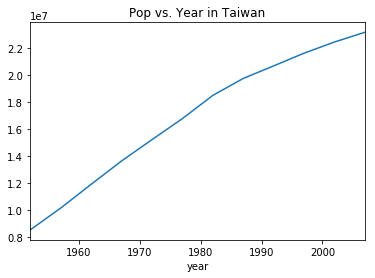

In [24]:
gapminder_twn = gapminder[gapminder['country'] == 'Taiwan']
gapminder_twn[['year', 'pop']].plot(kind = 'line', x = 'year', y = 'pop', title = 'Pop vs. Year in Taiwan', legend = False)
plt.show()

繪製 2007 年各國人均所得與平均壽命的散佈圖

In [30]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]

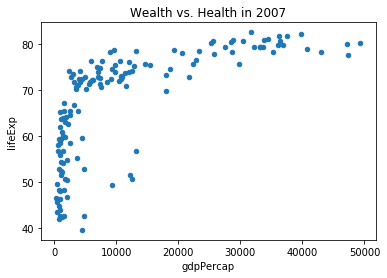

In [29]:
gapminder_2007.plot(kind = 'scatter', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007')
plt.show()


# 作業3: 台北市各行政區交通意外受傷人數

In [9]:
base_url = "https://data.taipei/api/getDatasetInfo/downloadResource?id={}&rid={}"
_id = "2f238b4f-1b27-4085-93e9-d684ef0e2735"
rid = "ea731a84-e4a1-4523-b981-b733beddbc1f"
csv_url = base_url.format(_id, rid)
df_raw = pd.read_csv(csv_url, encoding='big5')

df = df_raw.copy()

df['區序'] = df['區序'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df = (df[df['性別'].isin([1, 2])]
      .groupby(['區序', '性別'])[['死亡人數', '受傷人數']]
      .sum()
      .reset_index()
      .sort_values('受傷人數'))

df['性別'] = df['性別'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)

# 顯示結果
display(df_raw.head())
display(df.head())

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
0,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,1,B03,2,41.0,3.0,8,50,14.0,9.0
1,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,2,C03,2,58.0,2.0,8,50,14.0,9.0
2,107,1,7,17,42,2,01大同區,大同區重慶北路2段與南京西路口,0,1,1,B01,1,59.0,3.0,6,40,4.0,2.0
3,107,1,7,17,42,2,01大同區,大同區重慶北路3段與南京西路口,0,1,2,C03,1,18.0,2.0,6,40,4.0,2.0
4,107,1,14,9,56,2,01大同區,大同區承德路3段與民族西路口,0,1,1,C03,1,20.0,2.0,8,50,4.0,1.0


,區序,性別,死亡人數,受傷人數
0,南港區,女性,2,799
1,萬華區,女性,2,1084
2,松山區,女性,30,1146
3,大同區,女性,3,1336
4,士林區,女性,3,1660
